# Laboratorium 6 - Kwadratury

Zadanie 1. Wiadomo, że
$$
\int_{0}^{1} \frac{4}{1+x^2} dx = \pi. \quad (1)
$$
Powyższą równość można wykorzystać do obliczenia przybliżonej wartości $\pi$ poprzez całkowanie numeryczne.

### Zadanie 1 (a)

Oblicz wartość powyższej całki, korzystając ze złożonych kwadratur otwartej prostokątów (ang. mid-point rule), trapezów i Simpsona.
Można wykorzystać funkcje $\texttt{integrate.trapz}$ i $\texttt{integrate.simps}$ z biblioteki $\texttt{scipy}$.
Na przedziale całkowania rozmieść $2^m+1$ równoodl$egłych węzłów.
W kolejnych próbach $m$ wzrasta o 1, tzn. między każde dwa sąsiednie węzły dodawany jest nowy węzeł, a ich zagęszczenie zwiększa się dwukrotnie.
Przyjmij zakres wartości $m$ od 1 do 25.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate
import seaborn as sns
from IPython.display import display

sns.set_style("darkgrid")

In [2]:
def f(x):
    return 4 / (1 + x**2)


a = 0
b = 1
width = b - a
m_vec = np.arange(1, 26)
n_vec = 2**m_vec + 1

In [3]:
def quad_int(xs, f):
    s = 0
    for i in range(len(xs) - 1):
        dx = xs[i + 1] - xs[i]
        x = (xs[i] + xs[i + 1]) / 2
        s += f(x) * dx
    return s


def trap(xs, f):
    return integrate.trapezoid([f(xs)], x=xs)


def simpson(xs, f):
    return integrate.simpson(f(xs), x=xs)

In [4]:
values_list = []
formula_list = [quad_int, trap, simpson]

for formula in formula_list:
    values = []
    n_nodes = [2**m + 1 for m in m_vec]
    x_nodes = [np.linspace(a, b, n) for n in n_nodes]
    for nodes in x_nodes:
        value = formula(nodes, f)
        values.append(value)
    values_list.append(values)

In [5]:
errors_list = []

for i, values in enumerate(values_list):
    errors = []
    for j, value in enumerate(values):
        error = np.abs(value - np.pi) / np.pi
        errors.append(error)
    errors_list.append(errors)

Dla każdej metody narysuj wykres wartości bezwzględnej błędu względnego w zależności od
liczby ewaluacji funkcji podcałkowej, $n+1$ (gdzie $n = 1/h$, z krokiem $h$).
Wyniki przedstaw na wspólnym wykresie, używając skali logarytmicznej na obu osiach.

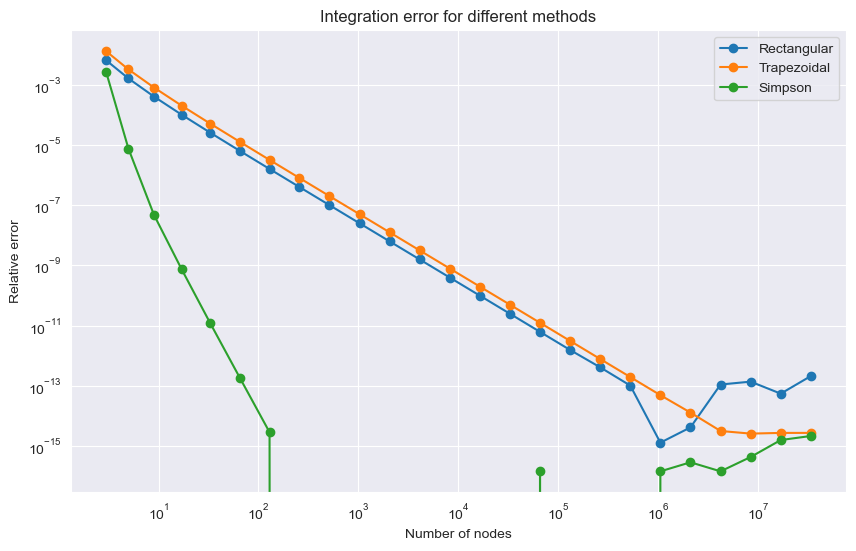

In [6]:
plt.figure(figsize=(10, 6))

plt.plot(2**m_vec + 1, errors_list[0], label="Rectangular", marker="o")
plt.plot(2**m_vec + 1, errors_list[1], label="Trapezoidal", marker="o")
plt.plot(2**m_vec + 1, errors_list[2], label="Simpson", marker="o")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of nodes")
plt.ylabel("Relative error")
plt.title("Integration error for different methods")
plt.legend()
plt.show()

Nieciągłość wykresu dla metody Simpsona wynika z osiągnięcia precyzji większej niż precyzja float64, umieszczenie wartości zerowych na wykresie logarytmicznym jest niemożliwe.
Metoda Simpsona jest też najdokładniejsza spośród trzech rozważanych.

### Zadanie 1 (b)

Czy istnieje pewna wartość, poniżej której zmniejszanie kroku $h$ nie zmniejsza już błędu kwadratury?
Porównaj wartość $h_{\min}$, odpowiadającą minimum wartości bezwzględnej błędu względnego, z wartością wyznaczoną w laboratorium 1.

In [7]:
hs = 1.0 / (2**m_vec)

min_list = []
for i, values in enumerate(errors_list):
    min_value = min(values)
    min_index = values.index(min_value)
    min_list.append((hs[min_index]))

min_df = pd.DataFrame(
    {
        "Method": ["Rectangular", "Trapezoidal", "Simpson"],
        "h_min": min_list,
    }
)
display(min_df)

,Method,h_min
0,Rectangular,9.536743e-07
1,Trapezoidal,1.192093e-07
2,Simpson,3.906250e-03


Na wykresie powyżej można zauważyć moment, w którym zmniejszanie kroku przestaje zmniejszać błąd kwadratury, a nawet go zwiększa.
Wartość $h$, w którym błąd osiąga minimum jest zbliżony dla metody prostokątów i trapezów oraz znacznie mniejszy dla metody Simpsona. Wynika to z tego, że błąd tej metody znacznie szybciej zbiega do zera. Obliczony krok dla minimalnego błędu jest porównywalny do tego obliczonego w laboratorium nr. 1 ($\cong 10^{-8}$)

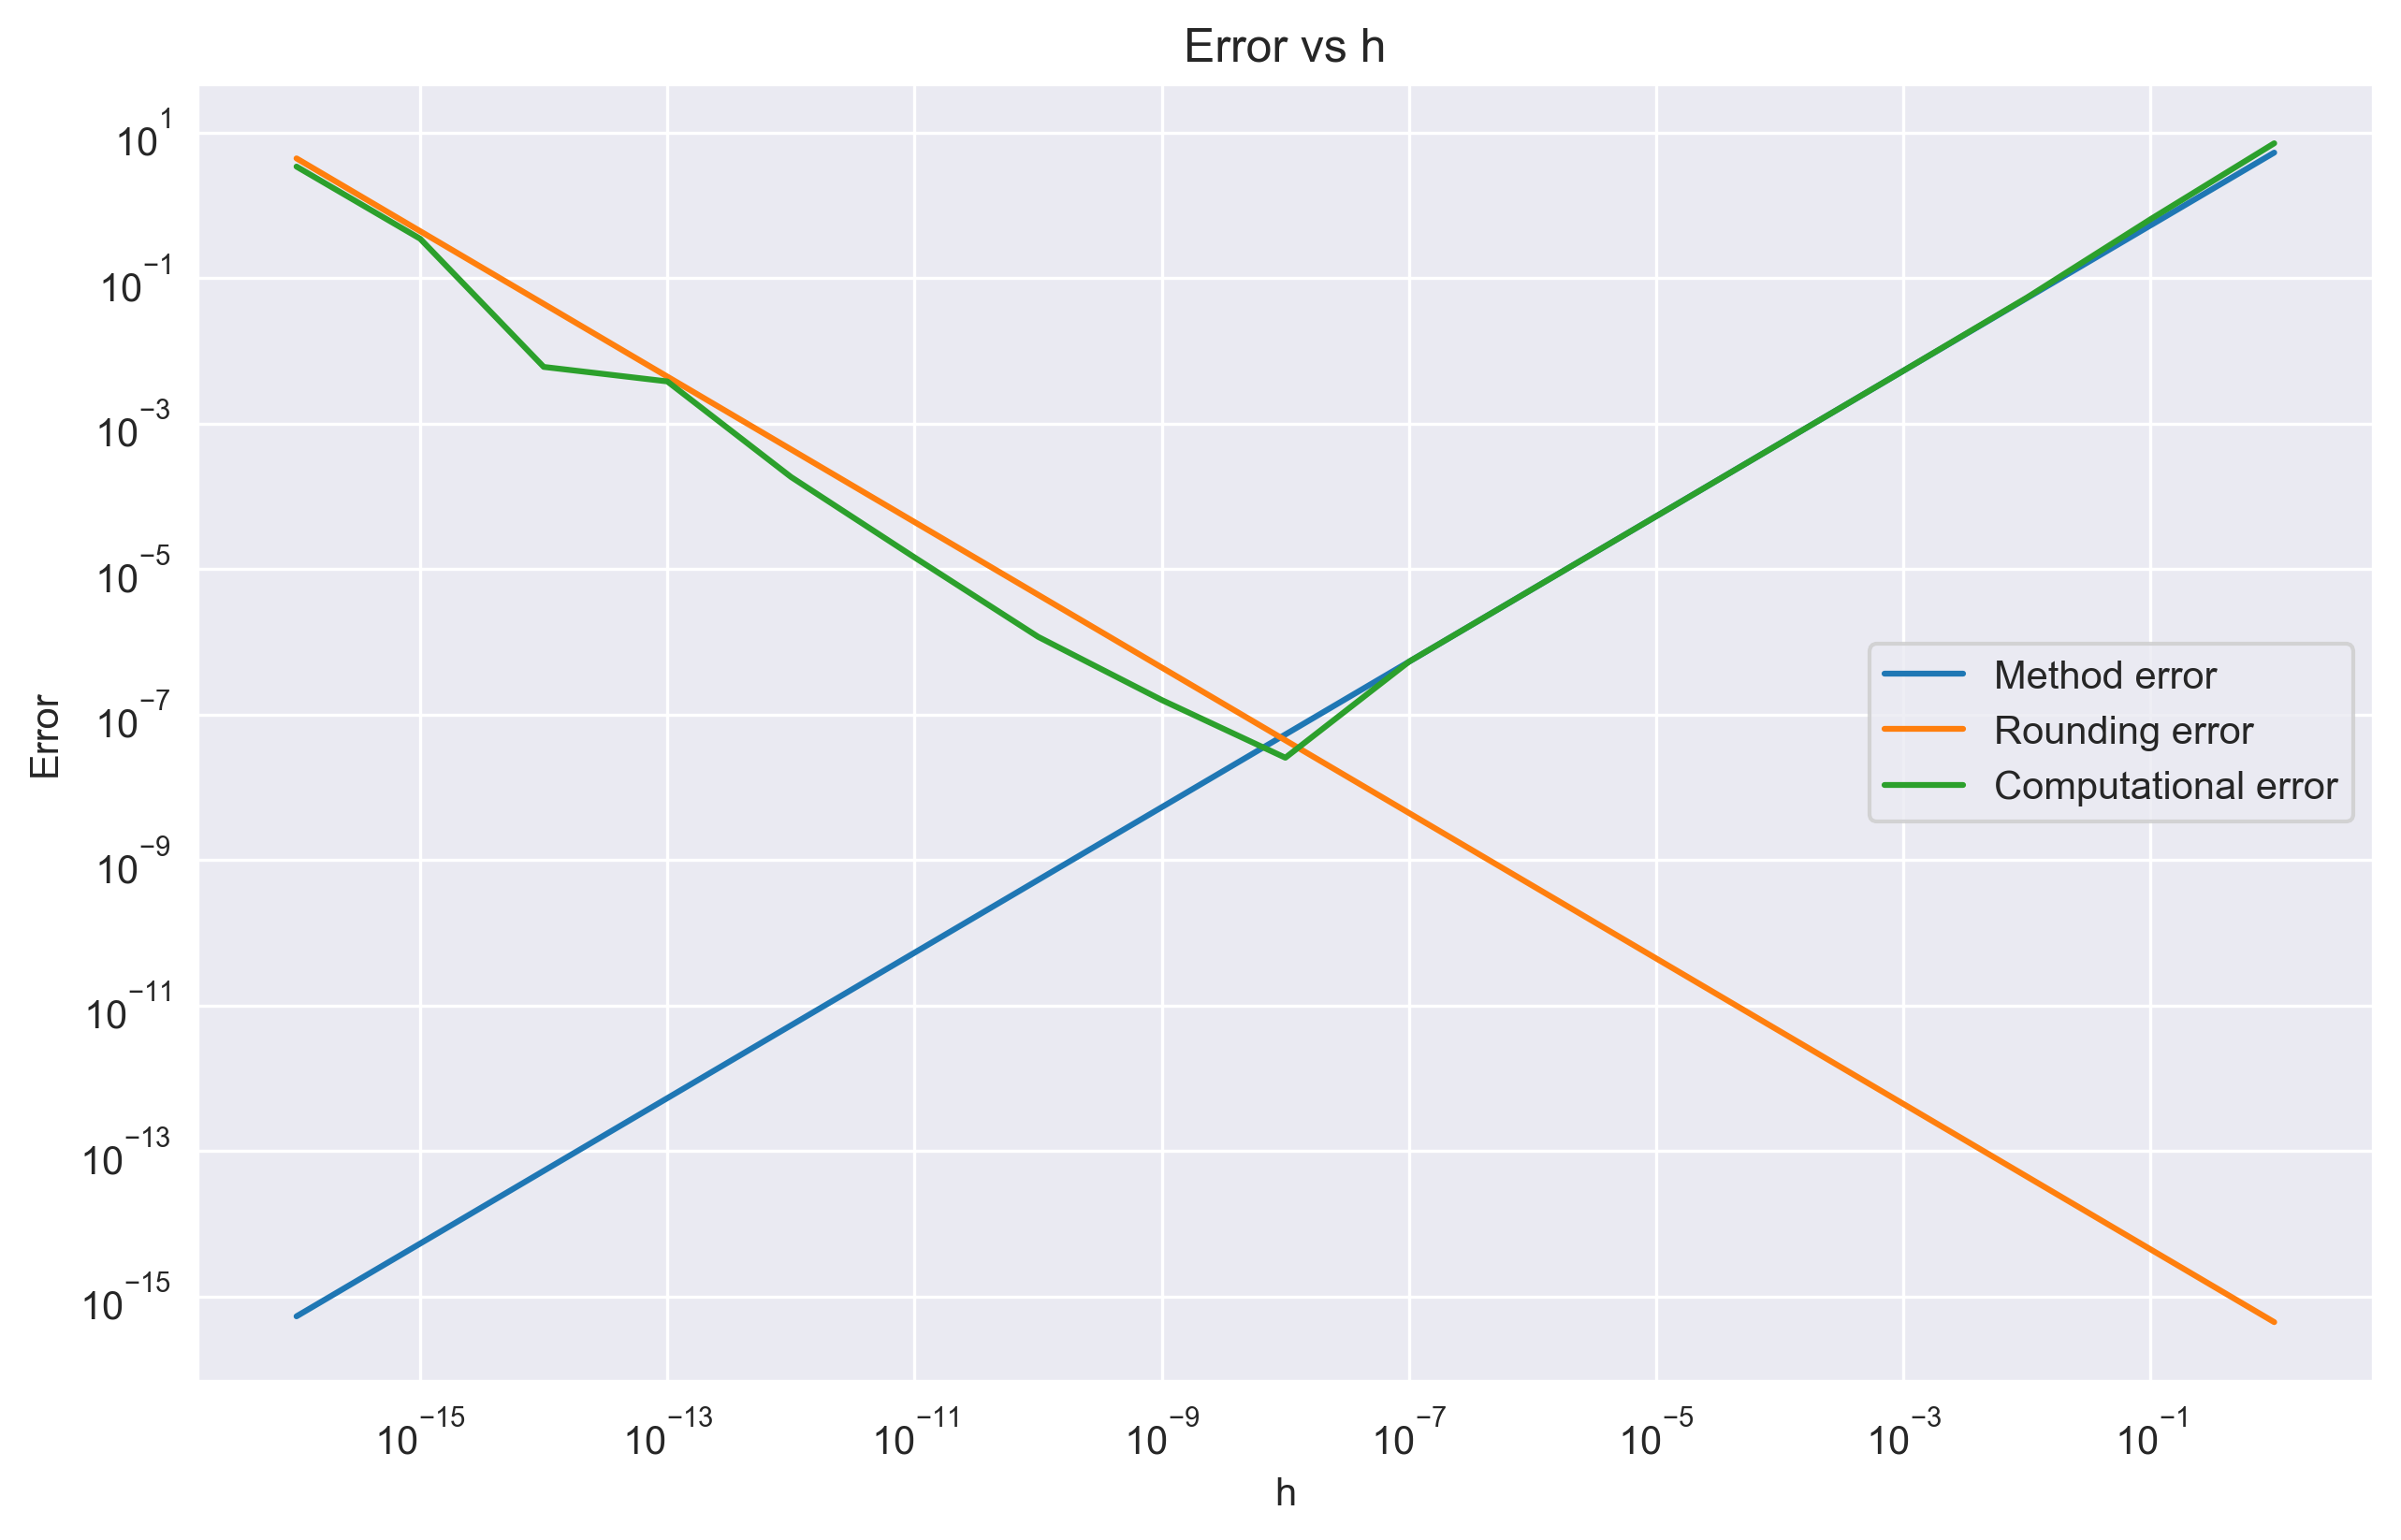

Wykres ilustrujący wyniki z pierwszego laboratorium.

### Zadanie 1 (c)
Dla każdej z użytych metod porównaj empiryczny rząd zbieżności z rząd zbieżności przewidywanym przez teorię.
Aby wyniki miały sens, do obliczenia rzędu empirycznego użyj wartości $h$ z zakresu, w którym błąd metody przeważa nad błędem numerycznym.

In [8]:
emp_conv_list = [2, 2, 4]

In [9]:
h_vec = width / n_vec
rounding_errors_list = n_vec * np.finfo(np.float64).eps


def calculate_convergence_rate(errors):
    return [
        np.log(errors[i + 1] / errors[i]) / np.log(h_vec[i + 1] / h_vec[i])
        for i in range(len(errors) - 1)
        if rounding_errors_list[i] < errors[i]
    ]


conv_rect = calculate_convergence_rate(errors_list[0])
conv_trap = calculate_convergence_rate(errors_list[1])
conv_simp = calculate_convergence_rate(errors_list[2])

conv_df_rect = pd.DataFrame(conv_rect, columns=["Rectangular"])
display(conv_df_rect)
conv_df_trap = pd.DataFrame(conv_trap, columns=["Trapezoidal"])
display(conv_df_trap)
conv_df_simp = pd.DataFrame(conv_simp, columns=["Simpson"])
display(conv_df_simp)

,Rectangular
0,2.707131
1,2.358356
2,2.179738
3,2.090014
4,2.045045
5,2.022532
6,2.011269
7,2.005635
8,2.002818
9,2.001409


,Trapezoidal
0,2.710441
1,2.358425
2,2.179742
3,2.090014
4,2.045045
5,2.022532
6,2.011269
7,2.005635
8,2.002818
9,2.001409


,Simpson
0,11.432385
1,8.623452
2,6.536879
3,6.269862
4,6.135489
5,6.090216


Obliczone rzędy zbieżności dla metody prostokątów i trapezów to 2 (zgodne z teoretycznym rzędem zbieżności), a dla metody Simpsona 6 - co nie zgadza się z wartością teoretyczną równą 4. Może to wynikać z faktu, że precyzja obliczeń nie pozwala obliczyć rzędu dla kolejnych wartości $m$.

# Zadanie 2.
Oblicz wartość całki
$$
\begin{equation}
\int_0^1 \frac{4}{1+x^2} dx
\end{equation}
$$
metodą Gaussa-Legendre'a.
Narysuj wykres wartości bezwzględnej błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej, $n+1$.
Przyjmij na tyle duży zakres $n$, aby wykryć, kiedy błąd numeryczny zaczyna przeważać nad błędem metody.
Postaraj się umiejscowić otrzymane wyniki na wykresie stworzonym w podpunkcie (a).

In [10]:
m_vec_gauss = np.arange(1, 15)
n_vec_gauss = 2**m_vec_gauss + 1
leggaus_values = [np.polynomial.legendre.leggauss(n) for n in n_vec_gauss]
x_vec_gauss = [x_vec * 0.5 + 0.5 for x_vec, _ in leggaus_values]
y_vec_gauss = [w_vec for _, w_vec in leggaus_values]
gauss_values = [np.sum(f(x) * 0.5 * w) for x, w in zip(x_vec_gauss, y_vec_gauss)]
gauss_errors = [np.abs(value - np.pi) / np.pi for value in gauss_values]

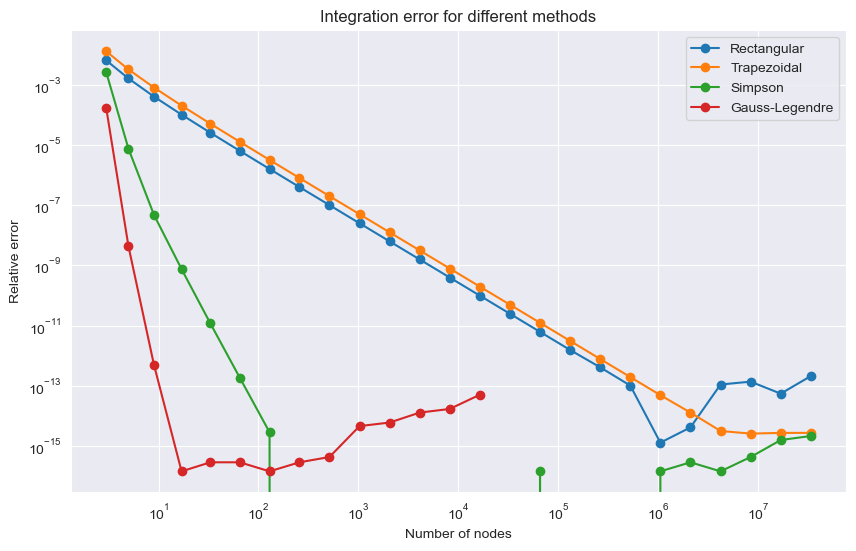

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(2**m_vec + 1, errors_list[0], label="Rectangular", marker="o")
plt.plot(2**m_vec + 1, errors_list[1], label="Trapezoidal", marker="o")
plt.plot(2**m_vec + 1, errors_list[2], label="Simpson", marker="o")
plt.plot(2**m_vec_gauss + 1, gauss_errors, label="Gauss-Legendre", marker="o")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of nodes")
plt.ylabel("Relative error")
plt.title("Integration error for different methods")
plt.legend()
plt.show()

Na powyższym wykresie można zauważyć, że błąd metody Gaussa - Legendre'a maleje najszybciej, ale błąd numeryczny zaczyna przeważać nad błędem metody już dla kilkunastu węzłów. Dlatego korzystając z tej metody najbardziej należy uważać na ilość węzłów wykorzystanych w obliczeniach.